In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [108]:
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

In [109]:
X.shape

(30, 1)

In [110]:
X = X.reshape(X.shape[1],X.shape[0])

In [111]:
X.shape

(1, 30)

In [112]:
Y.shape

(30,)

In [113]:
Y = Y.reshape(1,Y.shape[0])
Y.shape

(1, 30)

In [114]:
X

array([[ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
         4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
         7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5]])

In [115]:
Y


array([[ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
         54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
         61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
         98273., 101302., 113812., 109431., 105582., 116969., 112635.,
        122391., 121872.]])

In [116]:
train_size = 0.8
X_train = X[:,:int(0.8*X.shape[1])]
X_test = X[:,int(0.8*X.shape[1]):]
Y_train = Y[:,:int(0.8*Y.shape[1])]
Y_test = Y[:,int(0.8*Y.shape[1]):]

In [117]:
X_den = np.std(X_train)-np.mean(X_train)
X_add = np.mean(X_train)
Y_den = np.std(Y_train)-np.mean(Y_train)
Y_add = np.mean(Y_train)
inverse_cache = (X_den, X_add, Y_den, Y_add)


In [118]:
X_train = (X_train-X_add)/X_den
X_test =  (X_test-X_add)/X_den

In [119]:
Y

array([[ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
         54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
         61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
         98273., 101302., 113812., 109431., 105582., 116969., 112635.,
        122391., 121872.]])

In [120]:
Y_train = (Y_train-Y_add)/Y_den
Y_test = (Y_test-Y_add)/Y_den
Y_train

array([[ 0.59095174,  0.44052521,  0.62628949,  0.4992753 ,  0.57893867,
         0.21172868,  0.13482744,  0.2598906 ,  0.04067384,  0.19973752,
         0.06757174,  0.23031826,  0.20482335,  0.20210506,  0.11376071,
        -0.03589857,  0.00594991, -0.36801196, -0.33019707, -0.60590598,
        -0.55763445, -0.7008926 , -0.76729336, -1.04153352]])

In [121]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1, 24)
(1, 6)
(1, 24)
(1, 6)


In [204]:
def forward_prop(X, params):
    W = params['W']
    b = params['b']
    
    Z = np.dot(W.T,X) + b
    return Z

In [205]:
def backward_prop(X,Y, Z):
    m = Y.shape[1]
    dZ = Z-Y
    dW = np.dot(dZ,X.T)/m
    db = np.sum(dZ)/m
    
    grads = {}
    grads['dW'] = dW
    grads['db'] = db
    
    return grads

In [231]:
def compute_cost(Y,Z):
    m = Y.shape[1]
    cost = np.sum(np.power(np.abs(Z-Y),3))/(2*m)
    return cost

In [232]:
def update_parameters(params, grads, alpha):
    dW = grads['dW']
    db = grads['db']
    W = params['W']
    b = params['b']
    W = W - alpha * dW
    b = b - alpha * db
    params['W'] = W
    params['b'] = b
    
    return params

In [233]:
def initialize_params(x, y):
    n_x = x.shape[0]
#     print("n_x = ", n_x)
    m = y.shape[1]
    W = np.random.randn(n_x,1)
    b = 0.
    params = {}
    params['W'] = W
    params['b'] = b
    
    return params

In [234]:
def train(X,Y,num_iter=1000, alpha=0.01):
    params = initialize_params(X,Y)
    costs = []
    for i in range(num_iter):
        
       
        y_hat = forward_prop(X, params)
        cost = compute_cost(Y, y_hat)
        costs.append(cost)
        grads = backward_prop(X,Y, y_hat)
        if(i%200==0):
            print(cost)
        params = update_parameters(params, grads, alpha)
    return params,costs

In [235]:
params = {}
params,costs = train(X_train, Y_train, 2000, 0.01)
params

2.3583096815471754
0.03172858417256997
0.0022408925947292745
0.001466895924210443
0.0014315206494942105
0.0014296508643243382
0.0014295248015492694
0.0014295108912991527
0.0014295084997952903
0.0014295080057795003


{'W': array([[0.50034366]]), 'b': 1.0061396160665399e-17}

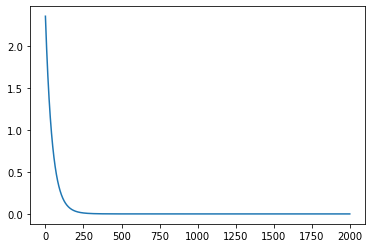

In [236]:
x_vals = np.arange(2000)
plt.plot(x_vals,costs)

In [237]:
x = np.array([0,1,2])

x.reshape(x.shape[0],1)
x.shape
# plt.plot(x, x**2+x+3)

(3,)

In [218]:
type(X_train)

numpy.ndarray

In [238]:
x_vals =  X_train*inverse_cache[0]+inverse_cache[1]
x_train_vals = list(x_vals[0])
x_train_vals
x_vals

array([[1.1, 1.3, 1.5, 2. , 2.2, 2.9, 3. , 3.2, 3.2, 3.7, 3.9, 4. , 4. ,
        4.1, 4.5, 4.9, 5.1, 5.3, 5.9, 6. , 6.8, 7.1, 7.9, 8.2]])

In [239]:
y_vals = predict(X_train, params,inverse_cache)
y_train_vals = list(y_vals[0])
y_train_vals

[34717.942087777184,
 36728.49749863487,
 38739.05290949256,
 43765.44143663677,
 45775.99684749446,
 52812.94078549636,
 53818.2184909252,
 55828.773901782886,
 55828.773901782886,
 60855.1624289271,
 62865.71783978478,
 63870.99554521363,
 63870.99554521363,
 64876.273250642465,
 68897.38407235785,
 72918.49489407321,
 74929.0503049309,
 76939.60571578858,
 82971.27194836165,
 83976.54965379048,
 92018.77129722123,
 95034.60441350775,
 103076.8260569385,
 106092.65917322502]

In [240]:
list(Y_train[0]*inverse_cache[2]+inverse_cache[3])

[39343.0,
 46205.0,
 37731.0,
 43525.0,
 39891.0,
 56642.0,
 60150.0,
 54445.0,
 64445.0,
 57189.0,
 63218.0,
 55794.0,
 56957.0,
 57081.0,
 61111.0,
 67938.0,
 66029.0,
 83088.0,
 81363.0,
 93940.0,
 91738.0,
 98273.0,
 101302.0,
 113812.0]

In [241]:
params

{'W': array([[0.50034366]]), 'b': 1.0061396160665399e-17}

In [242]:
inverse_cache

(-2.2704325636517844,
 4.241666666666667,
 -45616.950864814484,
 66300.41666666667)

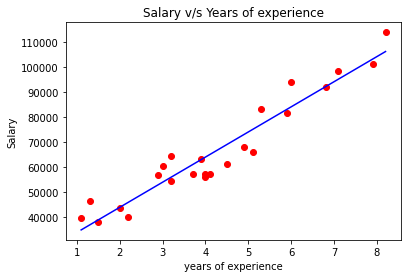

In [259]:
plt.scatter(x_train_vals,list(Y_train[0]*inverse_cache[2]+inverse_cache[3]), color='r')
plt.plot(x_train_vals, y_train_vals, color='b')
plt.title('Salary v/s Years of experience')
plt.xlabel('years of experience')
plt.ylabel('Salary')
plt.show()

In [244]:
def predict(X_test, params,inverse_cache):
    Z = np.dot(params['W'].T,X_test)+params['b']
    Y_hat = Z*inverse_cache[2] + inverse_cache[3]
    return Y_hat

In [245]:
predictions = predict(X_test, params, inverse_cache)
predictions

array([[111119.04770037, 114134.88081666, 119161.2693438 ,
        120166.54704923, 127203.49098723, 129214.04639809]])

In [252]:
Y_test = Y_test*inverse_cache[2]+inverse_cache[3]

In [254]:
y_orig = []
y_orig = [list(Y_test[0])]
y_orig

[[109431.0,
  105582.00000000001,
  116969.00000000001,
  112635.0,
  122391.0,
  121872.0]]

In [255]:
y_pred = [list(predictions[0])]
y_pred

[[111119.04770036924,
  114134.88081665576,
  119161.2693438,
  120166.54704922883,
  127203.49098723073,
  129214.04639808842]]

In [256]:
print(np.concatenate((y_orig, y_pred),0))

[[109431.         105582.         116969.         112635.
  122391.         121872.        ]
 [111119.04770037 114134.88081666 119161.2693438  120166.54704923
  127203.49098723 129214.04639809]]


In [257]:
def single_pred(X,params=params,inverse_cache=inverse_cache):
  X = (X-inverse_cache[1])/inverse_cache[0]
  Z = params['W']*X+params['b']
  Z = Z*inverse_cache[2] + inverse_cache[3]
  return Z



In [258]:
single_pred(2)

array([[43765.44143664]])